# Fire up graphlab create

In [1]:
import graphlab

[WARNING] sklearn version 0.14.1 is not supported. Minimum required version: 0.15. sklearn support will be disabled.


# Load some house sales data

Dataset is from house sales in King County, the region where the city of Seattle, WA is located.

In [2]:
sales = graphlab.SFrame.read_csv('home_data.csv')

[INFO] This trial license of GraphLab Create is assigned to fgh@planwell.com and will expire on November 05, 2015. Please contact trial@dato.com for licensing options or to request a free non-commercial license for personal or academic use.

[INFO] Start server at: ipc:///tmp/graphlab_server-3179 - Server binary: /usr/local/lib/python2.7/dist-packages/graphlab/unity_server - Server log: /tmp/graphlab_server_1445681029.log
[INFO] GraphLab Server Version: 1.6.1


PROGRESS: Finished parsing file /home/kuntal/Downloads/github-notes/personal/tutorials-master/strata-nyc-2015/home-price/home_data.csv
PROGRESS: Parsing completed. Parsed 100 lines in 0.148374 secs.
------------------------------------------------------
Inferred types from first line of file as 
column_type_hints=[int,str,int,int,float,int,int,float,int,int,int,int,int,int,int,int,int,float,float,int,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------
PROGRESS: Finished parsing file /home/kuntal/Downloads/github-notes/personal/tutorials-master/strata-nyc-2015/home-price/home_data.csv
PROGRESS: Parsing completed. Parsed 21613 lines in 0.088792 secs.


In [5]:
sales.head(3)

Columns:
	id	int
	date	str
	price	int
	bedrooms	int
	bathrooms	float
	sqft_living	int
	sqft_lot	int
	floors	float
	waterfront	int
	view	int
	condition	int
	grade	int
	sqft_above	int
	sqft_basement	int
	yr_built	int
	yr_renovated	int
	zipcode	int
	lat	float
	long	float
	sqft_living15	int
	sqft_lot15	int

Rows: 3

Data:
+------------+-----------------+--------+----------+-----------+-------------+
|     id     |       date      | price  | bedrooms | bathrooms | sqft_living |
+------------+-----------------+--------+----------+-----------+-------------+
| 7129300520 | 20141013T000000 | 221900 |    3     |    1.0    |     1180    |
| 6414100192 | 20141209T000000 | 538000 |    3     |    2.25   |     2570    |
| 5631500400 | 20150225T000000 | 180000 |    2     |    1.0    |     770     |
+------------+-----------------+--------+----------+-----------+-------------+
+----------+--------+------------+------+-----------+-------+------------+---------------+
| sqft_lot | floors | waterfront | view | condition | grade | sqft_above | sqft_basement |
+----------+--------+------------+------+-----------+-------+------------+---------------+
|   5650   |  1.0   |     0      |  0   |     3     |   7   |    1180    |       0       |
|   7242   |  2.0   |     0      |  0   |     3     |   7   |    2170    |      400      |
|  10000   |  1.0   |     0      |  0   |     3     |   6   |    770     |       0       |
+----------+--------+------------+------+-----------+-------+------------+---------------+
+----------+--------------+---------+---------+----------+---------------+-----+
| yr_built | yr_renovated | zipcode |   lat   |   long   | sqft_living15 | ... |
+----------+--------------+---------+---------+----------+---------------+-----+
|   1955   |      0       |  98178  | 47.5112 | -122.257 |      1340     | ... |
|   1951   |     1991     |  98125  |  47.721 | -122.319 |      1690     | ... |
|   1933   |      0       |  98028  | 47.7379 | -122.233 |      2720     | ... |
+----------+--------------+---------+---------+----------+---------------+-----+
[3 rows x 21 columns]

# Exploring the data for housing sales 

The house price is correlated with the number of square feet of living space.

In [6]:
#graphlab.canvas.set_target('ipynb')
sales.show(view="Scatter Plot", x="sqft_living", y="price")

Canvas is accessible via web browser at the URL: http://localhost:59995/index.html
Opening Canvas in default web browser.


# Create a simple regression model of sqft_living to price

Split data into training and testing.  
We use seed=0 so that everyone running this notebook gets the same results.  In practice, you may set a random seed (or let GraphLab Create pick a random seed for you).  

In [8]:
train_data,test_data = sales.random_split(.8,seed=0)

## Build the regression model using only sqft_living as a feature

In [9]:
sqft_model = graphlab.linear_regression.create(train_data, target='price', features=['sqft_living'],validation_set=None)

PROGRESS: Linear regression:
PROGRESS: --------------------------------------------------------
PROGRESS: Number of examples          : 17384
PROGRESS: Number of features          : 1
PROGRESS: Number of unpacked features : 1
PROGRESS: Number of coefficients    : 2
PROGRESS: Starting Newton Method
PROGRESS: --------------------------------------------------------
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: | Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: | 1         | 2        | 1.027068     | 4349521.926170     | 262943.613754 |
PROGRESS: +-----------+----------+--------------+--------------------+---------------+


# Evaluate the simple model

In [10]:
print test_data['price'].mean()

543054.042563


In [11]:
print sqft_model.evaluate(test_data)

{'max_error': 4143550.8825285938, 'rmse': 255191.02870527358}


RMSE of about \$255,170!

# Let's show what our predictions look like

Matplotlib is a Python plotting library that is also useful for plotting.  You can install it with:

'pip install matplotlib'

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

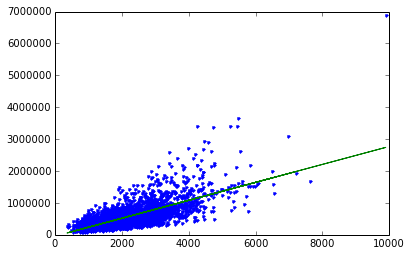

In [13]:
plt.plot(test_data['sqft_living'],test_data['price'],'.',
        test_data['sqft_living'],sqft_model.predict(test_data),'-')

Above:  blue dots are original data, green line is the prediction from the simple regression.

Below: we can view the learned regression coefficients. 

In [14]:
sqft_model.get('coefficients')

name,index,value
(intercept),None,-47114.0206702
sqft_living,None,281.957850166


# Explore other features in the data

To build a more elaborate model, we will explore using more features.

In [15]:
my_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']

In [18]:
sales[my_features].show()

Canvas is accessible via web browser at the URL: http://localhost:59995/index.html
Opening Canvas in default web browser.


In [20]:
sales.show(view='BoxWhisker Plot', x='zipcode', y='price')

Canvas is accessible via web browser at the URL: http://localhost:59995/index.html
Opening Canvas in default web browser.


Pull the bar at the bottom to view more of the data.  

98039 is the most expensive zip code.

# Build a regression model with more features

In [21]:
my_features_model = graphlab.linear_regression.create(train_data,target='price',features=my_features,validation_set=None)

PROGRESS: Linear regression:
PROGRESS: --------------------------------------------------------
PROGRESS: Number of examples          : 17384
PROGRESS: Number of features          : 6
PROGRESS: Number of unpacked features : 6
PROGRESS: Number of coefficients    : 7
PROGRESS: Starting Newton Method
PROGRESS: --------------------------------------------------------
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: | Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: | 1         | 2        | 0.023167     | 4091252.851074     | 257411.521124 |
PROGRESS: +-----------+----------+--------------+--------------------+---------------+


In [22]:
print my_features

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']


## Comparing the results of the simple model with adding more features

In [23]:
print sqft_model.evaluate(test_data)
print my_features_model.evaluate(test_data)

{'max_error': 4143550.8825285938, 'rmse': 255191.02870527358}
{'max_error': 3980583.1422290653, 'rmse': 252787.38364223117}


The RMSE goes down from \$255,170 to \$179,508 with more features.

# Apply learned models to predict prices of 3 houses

The first house we will use is considered an "average" house in Seattle. 

In [81]:
house1 = sales[sales['id']==5309101200]


In [82]:
house1

Columns:
	id	int
	date	str
	price	int
	bedrooms	int
	bathrooms	float
	sqft_living	int
	sqft_lot	int
	floors	float
	waterfront	int
	view	int
	condition	int
	grade	int
	sqft_above	int
	sqft_basement	int
	yr_built	int
	yr_renovated	int
	zipcode	int
	lat	float
	long	float
	sqft_living15	int
	sqft_lot15	int

Rows: Unknown

Data:
+------------+-----------------+--------+----------+-----------+-------------+
|     id     |       date      | price  | bedrooms | bathrooms | sqft_living |
+------------+-----------------+--------+----------+-----------+-------------+
| 5309101200 | 20140605T000000 | 620000 |    4     |    2.25   |     2400    |
+------------+-----------------+--------+----------+-----------+-------------+
+----------+--------+------------+------+-----------+-------+------------+---------------+
| sqft_lot | floors | waterfront | view | condition | grade | sqft_above | sqft_basement |
+----------+--------+------------+------+-----------+-------+------------+---------------+
|   5350   |  1.5   |     0      |  0   |     4     |   7   |    1460    |      940      |
+----------+--------+------------+------+-----------+-------+------------+---------------+
+----------+--------------+---------+---------+---------+---------------+-----+
| yr_built | yr_renovated | zipcode |   lat   |   long  | sqft_living15 | ... |
+----------+--------------+---------+---------+---------+---------------+-----+
|   1929   |      0       |  98117  | 47.6763 | -122.37 |      1250     | ... |
+----------+--------------+---------+---------+---------+---------------+-----+
[? rows x 21 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use len(sf) to force materialization.

<img src="http://info.kingcounty.gov/Assessor/eRealProperty/MediaHandler.aspx?Media=2916871">

In [83]:
print house1['price']

[620000, ... ]


In [84]:
print sqft_model.predict(graphlab.SFrame(house1))

[629584.8197281545]


In [80]:
print my_features_model.predict(house1)

[730345.7452716269]


In this case, the model with more features provides a worse prediction than the simpler model with only 1 feature.  However, on average, the model with more features is better.

## Prediction for a second,Fancy House

We will now examine the predictions for a fancier house.

In [87]:
house2 = sales[sales['id']==1925069082]

In [88]:
house2

Columns:
	id	int
	date	str
	price	int
	bedrooms	int
	bathrooms	float
	sqft_living	int
	sqft_lot	int
	floors	float
	waterfront	int
	view	int
	condition	int
	grade	int
	sqft_above	int
	sqft_basement	int
	yr_built	int
	yr_renovated	int
	zipcode	int
	lat	float
	long	float
	sqft_living15	int
	sqft_lot15	int

Rows: Unknown

Data:
+------------+-----------------+---------+----------+-----------+-------------+
|     id     |       date      |  price  | bedrooms | bathrooms | sqft_living |
+------------+-----------------+---------+----------+-----------+-------------+
| 1925069082 | 20150511T000000 | 2200000 |    5     |    4.25   |     4640    |
+------------+-----------------+---------+----------+-----------+-------------+
+----------+--------+------------+------+-----------+-------+------------+---------------+
| sqft_lot | floors | waterfront | view | condition | grade | sqft_above | sqft_basement |
+----------+--------+------------+------+-----------+-------+------------+---------------+
|  22703   |  2.0   |     1      |  4   |     5     |   8   |    2860    |      1780     |
+----------+--------+------------+------+-----------+-------+------------+---------------+
+----------+--------------+---------+---------+----------+---------------+-----+
| yr_built | yr_renovated | zipcode |   lat   |   long   | sqft_living15 | ... |
+----------+--------------+---------+---------+----------+---------------+-----+
|   1952   |      0       |  98052  | 47.6393 | -122.097 |      3140     | ... |
+----------+--------------+---------+---------+----------+---------------+-----+
[? rows x 21 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use len(sf) to force materialization.

<img src="https://ssl.cdn-redfin.com/photo/1/bigphoto/302/734302_0.jpg">

In [89]:
print sqft_model.predict(house2)

[1261170.404099968]


In [90]:
print my_features_model.predict(house2)

[1261118.943457391]


In this case, the model with more features provides a better prediction.  This behavior is expected here, because this house is more differentiated by features that go beyond its square feet of living space, especially the fact that it's a waterfront house. 

## Last house, super fancy

Our last house is a very large one owned by a famous Seattleite.

In [92]:
bill_gates = {'bedrooms':[8], 
              'bathrooms':[25], 
              'sqft_living':[50000], 
              'sqft_lot':[225000],
              'floors':[4], 
              'zipcode':[98039], 
              'condition':[10], 
              'grade':[10],
              'waterfront':[1],
              'view':[4],
              'sqft_above':[37500],
              'sqft_basement':[12500],
              'yr_built':[1994],
              'yr_renovated':[2010],
              'lat':[47.627606],
              'long':[-122.242054],
              'sqft_living15':[5000],
              'sqft_lot15':[40000]}

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d9/Bill_gates%27_house.jpg/2560px-Bill_gates%27_house.jpg">

In [93]:
print my_features_model.predict(graphlab.SFrame(bill_gates))

[15709706.774994992]


The model predicts a price of over $13M for this house! But we expect the house to cost much more.  (There are very few samples in the dataset of houses that are this fancy, so we don't expect the model to capture a perfect prediction here.)